In [2]:
import pandas as pd 
import numpy as np

df = pd.read_csv("GBP_USD AdjCl.csv")

df.head()

,Date,GBP_USD
0,12/1/2003,1.718597
1,12/2/2003,1.730313
2,12/3/2003,1.728101
3,12/4/2003,1.720697
4,12/5/2003,1.733102


In [3]:
df = df.replace('ND', np.nan)
df = df.dropna().reset_index(drop=True)
df.isna().sum()

Date       0
GBP_USD    0
dtype: int64

In [4]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['month_year'] = df['Date'].dt.to_period('M')

In [6]:
df_groupby_gbp = df.groupby('month_year').GBP_USD.mean().reset_index()
print(df_groupby_gbp)

    month_year   GBP_USD
0      2003-12  1.753904
1      2004-01  1.821047
2      2004-02  1.869247
3      2004-03  1.828007
4      2004-04  1.804626
..         ...       ...
224    2022-08  1.199391
225    2022-09  1.134704
226    2022-10  1.129808
227    2022-11  1.172473
228    2022-12  1.220067

[229 rows x 2 columns]


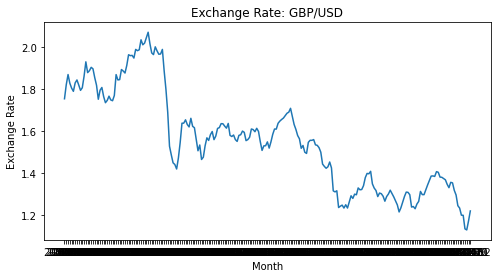

In [7]:
from matplotlib import pyplot as plt

x = df_groupby_gbp['month_year'].astype(str)
y = df_groupby_gbp['GBP_USD']

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Exchange Rate: GBP/USD")
plt.xlabel("Month")
plt.ylabel("Exchange Rate")
plt.show()

In [8]:
groupby_all = df.groupby('month_year').apply(lambda x: pd.Series({
                                                    'GBP_mean': x['GBP_USD'].mean()
})).reset_index()

groupby_all = pd.DataFrame(groupby_all)

groupby_all['USD_mean'] = [1 for i in range(229)]
groupby_all.head()

,month_year,GBP_mean,USD_mean
0,2003-12,1.753904,1
1,2004-01,1.821047,1
2,2004-02,1.869247,1
3,2004-03,1.828007,1
4,2004-04,1.804626,1


In [9]:
gbp_usd = df.loc[:,['GBP_USD']]
print(gbp_usd)

       GBP_USD
0     1.718597
1     1.730313
2     1.728101
3     1.720697
4     1.733102
...        ...
4942  1.225926
4943  1.229725
4944  1.219245
4945  1.213301
4946  1.224455

[4947 rows x 1 columns]


In [10]:
gbp = np.array(gbp_usd.iloc[:,0])

import statsmodels.stats.power as sms
from statsmodels import stats

n = sms.TTestPower().solve_power(0.3, power=0.9, alpha=0.05)
print(n)

118.68650942951754


In [11]:
gbp_sample = np.random.choice(gbp, size=119)

print(np.array(list(zip(gbp_sample))))

[[1.31337 ]
 [1.728489]
 [1.591495]
 [1.4518  ]
 [1.28123 ]
 [1.974217]
 [1.598466]
 [1.571191]
 [1.305296]
 [1.513798]
 [1.255335]
 [1.638002]
 [1.849283]
 [1.817092]
 [1.894334]
 [1.982082]
 [1.389912]
 [1.987281]
 [1.57771 ]
 [1.326453]
 [1.641497]
 [1.390009]
 [1.514005]
 [1.605987]
 [1.484494]
 [2.010616]
 [1.291489]
 [1.824085]
 [1.590002]
 [1.292658]
 [1.664004]
 [1.284027]
 [1.857286]
 [1.413008]
 [1.315288]
 [1.635671]
 [1.589143]
 [1.962092]
 [1.858011]
 [1.645793]
 [1.303373]
 [1.59913 ]
 [1.797914]
 [1.575547]
 [1.58932 ]
 [1.277661]
 [1.781705]
 [1.230466]
 [1.984796]
 [1.432295]
 [1.448184]
 [1.672436]
 [1.279771]
 [1.305466]
 [1.300559]
 [1.427205]
 [1.680588]
 [2.034298]
 [1.90949 ]
 [1.631987]
 [1.260891]
 [1.243565]
 [1.479991]
 [1.22832 ]
 [1.899804]
 [1.2213  ]
 [1.583707]
 [1.600896]
 [1.50281 ]
 [1.318218]
 [1.209161]
 [1.567103]
 [1.714031]
 [1.590508]
 [1.190094]
 [1.360933]
 [1.667723]
 [1.585791]
 [1.379824]
 [1.848805]
 [1.300898]
 [1.423406]
 [1.992786]
 [1.

In [12]:
from scipy.stats import shapiro, pearsonr

stat, p1 = shapiro(gbp_sample)
# stat, p2 = pearsonr(gbp_sample)

print(p1)

4.967677887179889e-05


In [13]:
ir_df = pd.read_csv("gbp_usd_swap_rates.csv")
ir_df.head()

,Date,Long Carry,Short Carry
0,3/1/2016,-0.28%,-0.62%
1,4/1/2016,-0.26%,-0.59%
2,5/1/2016,-0.22%,-0.61%
3,6/1/2016,-0.35%,-0.62%
4,7/1/2016,-0.44%,-0.71%


In [14]:
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype(float)
x_ir = np.array(x_ir).reshape(-1,1)

gbp_usd_fx = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2016-3') & (df_groupby_gbp['month_year'] <='2022-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx['GBP_USD']

y_fx = gbp_usd

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, train_size=0.7, test_size=0.3, random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print("R-squared of training data is: " + str(model.score(x_train, y_train)))
print("R-squared of testing data is: " + str(model.score(x_test, y_test)))

[1.33665025 1.28617004 1.28827338 1.32865755 1.25377857 1.32318886
 1.32739554 1.25377857 1.24957189 1.28028068 1.25546125 1.32360953
 1.28701138 1.25588192 1.32571287 1.28911472 1.27060531 1.27565333
 1.31393415 1.25714392 1.3665177  1.27439133 1.27018464 1.28028068
 1.32108552]
R-squared of training data is: 0.24810244071998833
R-squared of testing data is: 0.3693479950175471


In [16]:
model = LinearRegression()
model.fit(x_ir, y_fx)
y_fx_predict = model.predict(x_ir)

print("R-squared of the entire dataset is: " + str(model.score(x_ir, y_fx)))

R-squared of the entire dataset is: 0.2853931130031532


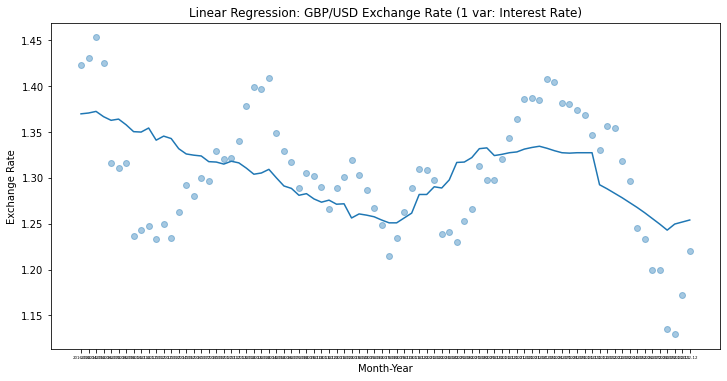

In [17]:
month_year = gbp_usd_fx['month_year']
month_year = month_year.astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: GBP/USD Exchange Rate (1 var: Interest Rate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [18]:
uk_gdp = pd.read_csv("uk_gdp_quarterly.csv")
usa_gdp = pd.read_csv("usa_gdp_quarterly.csv")

#Source: https://fred.stlouisfed.org


uk_gdp['month_year'] = pd.to_datetime(uk_gdp['DATE']).dt.to_period('M')
uk_gdp = uk_gdp.drop('DATE', axis=1)
uk_gdp = uk_gdp[['month_year', 'GDP']]

usa_gdp['month_year'] = pd.to_datetime(usa_gdp['DATE']).dt.to_period('M')
usa_gdp = usa_gdp.drop('DATE', axis=1)
usa_gdp = usa_gdp[['month_year', 'GDP']]

uk_gdp = uk_gdp.rename(columns={'GDP': 'UK_GDP'})
uk_usa_gdp = pd.merge(uk_gdp, usa_gdp, on="month_year", how="inner")
uk_usa_gdp = uk_usa_gdp.rename(columns={'GDP': 'USA_GDP'})
uk_usa_gdp['GDP_diff'] = uk_usa_gdp['UK_GDP'] - uk_usa_gdp['USA_GDP']

uk_usa_gdp_20162022 = uk_usa_gdp[(uk_usa_gdp['month_year'] >= '2016-03') & (uk_usa_gdp['month_year'] <='2022-12')].reset_index(drop=True)
gdp_diff = ["%.4f" %num for num in uk_usa_gdp_20162022['GDP_diff']]
print(gdp_diff)

['168985.9064', '169979.4323', '169979.4323', '169979.4323', '170662.2577', '170662.2577', '170662.2577', '171773.4866', '171773.4866', '171773.4866', '173040.8840', '173040.8840', '173040.8840', '173933.4310', '173933.4310', '173933.4310', '174824.3467', '174824.3467', '174824.3467', '175950.9737', '175950.9737', '175950.9737', '176192.5646', '176192.5646', '176192.5646', '176959.7944', '176959.7944', '176959.7944', '177923.1804', '177923.1804', '177923.1804', '178332.6530', '178332.6530', '178332.6530', '179436.6020', '179436.6020', '179436.6020', '179588.8314', '179588.8314', '179588.8314', '180639.3680', '180639.3680', '180639.3680', '180481.4167', '180481.4167', '180481.4167', '175453.1714', '175453.1714', '175453.1714', '137107.9343', '137107.9343', '137107.9343', '160940.5740', '160940.5740', '160940.5740', '162933.9104', '162933.9104', '162933.9104', '160883.3050', '160883.3050', '160883.3050', '171778.5173', '171778.5173', '171778.5173', '174850.7203', '174850.7203', '174850.7

In [19]:
x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)), dtype=object)
x_ir_gdp = x_ir_gdp.astype(float)

model.fit(x_ir_gdp, y_fx)
y_fx_predict_2 = model.predict(x_ir_gdp)

print(model.score(x_ir_gdp, y_fx))

0.32605102324344093


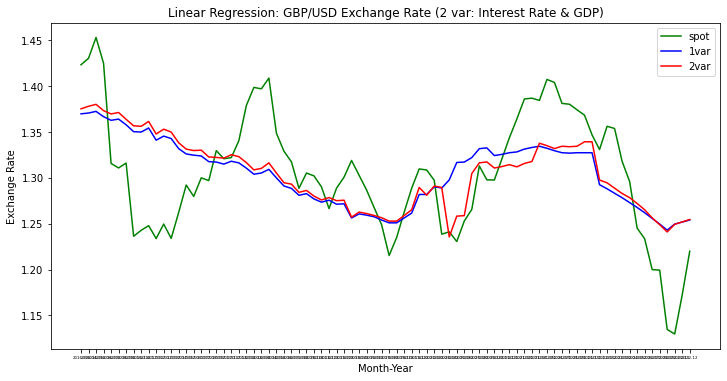

In [20]:
plt.figure(figsize=(12,6))
plt.plot(month_year, y_fx, color='g')
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.legend(['spot', '1var','2var'])
plt.title("Linear Regression: GBP/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [21]:
cpi = pd.read_csv("cpi_diffs.csv")
cpi.head()

,Date,UK_CPI,USA_CPI,CPI_diff
0,1/1/2012,3.16,2.93,0.23
1,2/1/2012,3.14,2.87,0.27
2,3/1/2012,3.02,2.65,0.37
3,4/1/2012,2.79,2.30,0.48
4,5/1/2012,2.57,1.70,0.86


In [22]:
cpi_diff = cpi['CPI_diff']

x_ir_gdp_cpi = np.array(list(zip(x_ir, gdp_diff, cpi_diff)), dtype=object)
x_ir_gdp_cpi = x_ir_gdp_cpi.astype(float)

model.fit(x_ir_gdp_cpi, y_fx)
y_fx_predict_4 = model.predict(x_ir_gdp_cpi)

print(model.score(x_ir_gdp_cpi, y_fx))

0.3260528826407082


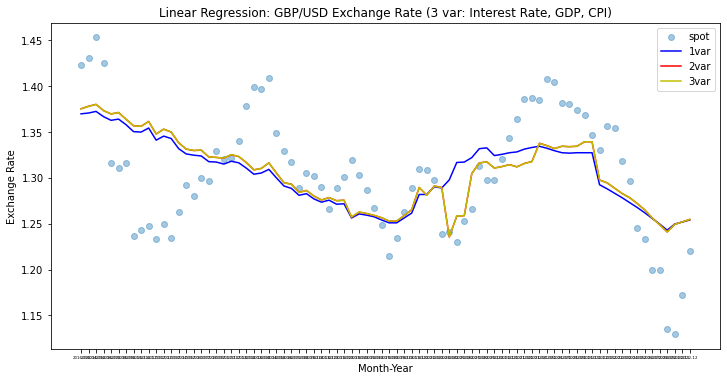

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_4, color='y')
plt.legend(['spot', '1var', '2var', '3var'])
plt.title("Linear Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP, CPI)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [24]:
unemployment_rate = pd.read_csv("uk_usa_uer.csv")
unemployment_rate.head()

,DATE,uk_unemployment rate,usa_unemployment rate
0,11/30/2022,3.7,3.7
1,10/31/2022,3.7,3.7
2,9/30/2022,3.6,3.5
3,8/31/2022,3.6,3.7
4,7/31/2022,3.5,3.5


In [25]:
unemployment_rate['uer_diff'] = unemployment_rate['uk_unemployment rate'] - unemployment_rate['usa_unemployment rate']
uer_diff_all = unemployment_rate['uer_diff']
uer_diff = ["%.4f" % num for num in uer_diff_all]

print(uer_diff)

['0.0000', '0.0000', '0.1000', '-0.1000', '0.0000', '0.0000', '0.2000', '0.2000', '0.2000', '-0.1000', '-0.2000', '0.1000', '-0.2000', '-0.5000', '-0.5000', '-0.9000', '-1.0000', '-1.3000', '-1.1000', '-1.1000', '-1.1000', '-1.3000', '-1.3000', '-1.6000', '-1.5000', '-1.8000', '-2.8000', '-3.5000', '-5.6000', '-6.7000', '-9.1000', '-10.6000', '-0.3000', '0.5000', '0.5000', '0.3000', '0.2000', '0.2000', '0.3000', '0.1000', '0.3000', '0.2000', '0.2000', '0.1000', '0.0000', '0.0000', '-0.1000', '0.0000', '0.3000', '0.2000', '0.4000', '0.3000', '0.2000', '0.0000', '0.2000', '0.2000', '0.2000', '0.1000', '0.1000', '0.2000', '0.2000', '0.2000', '0.0000', '-0.1000', '0.0000', '0.0000', '0.0000', '0.0000', '0.1000', '-0.1000', '-0.1000', '0.0000', '0.1000', '-0.1000', '-0.2000', '-0.1000', '0.1000', '0.0000', '0.2000', '-0.1000', '0.0000', '0.2000', '0.2000', '0.1000', '0.1000', '0.1000', '0.2000', '0.2000', '0.2000', '0.2000', '0.1000', '0.2000', '0.1000', '0.0000', '-0.1000', '0.1000', '-0.1

In [26]:
x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)), dtype=object)
x_ir_gdp_uer = x_ir_gdp_uer.astype(float)

model.fit(x_ir_gdp_uer, y_fx)
y_fx_predict_3 = model.predict(x_ir_gdp_uer)

print(model.score(x_ir_gdp_uer, y_fx))

0.34067584914245275


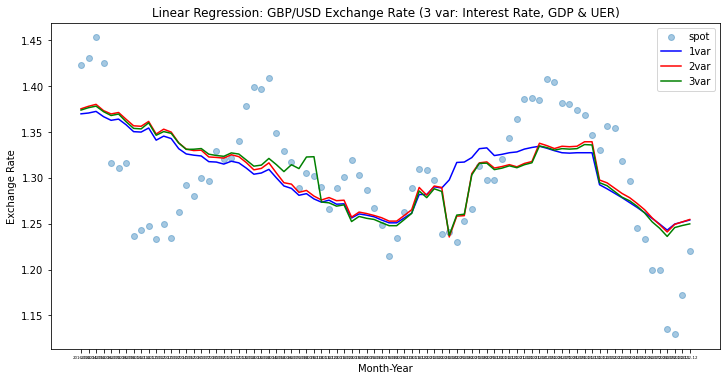

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.legend(['spot', '1var', '2var', '3var'])
plt.title("Linear Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.show()

In [28]:
month_year_future = [x+1 for x in range(0, 12)]
month_year_future = ['2023-0'+ str(x) for x in month_year_future]
print(month_year_future)

['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-010', '2023-011', '2023-012']


In [29]:
Date = range(1, 83)
Date = np.array(Date).reshape(-1,1)

Date_future = range(82, 99)
Date_future = np.array(Date_future).reshape(-1,1)

print(Date.shape)

(82, 1)


0.5571704107504747


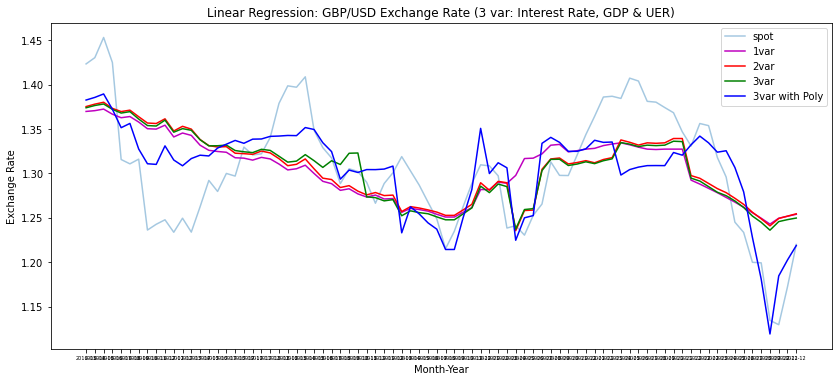

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)

x_poly = poly.fit_transform(x_ir_gdp_uer)

model_poly = LinearRegression()
model_poly.fit(x_poly, y_fx)
y_pred = model_poly.predict(x_poly)

print(model_poly.score(x_poly, y_fx))

plt.figure(figsize=(14,6))
plt.plot(month_year, y_fx, alpha=.4)
plt.plot(month_year, y_fx_predict, color='m')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='b')
plt.legend(['spot', '1var', '2var', '3var', '3var with Poly'])
plt.title("Linear Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

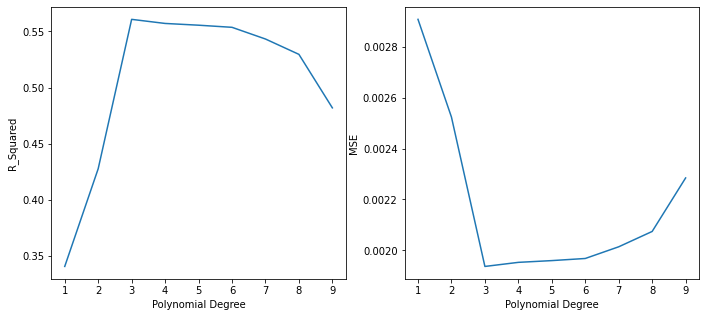

In [31]:
r_squared_list = []
mse_list = []
a = range(1,10,1)

for i in a:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(a, r_squared_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")
ax2 = plt.subplot(1,2,2)
plt.plot(a, mse_list)
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")

plt.subplots_adjust(0.0005)

plt.show()

0.3406758444370461
0.32754247422204086


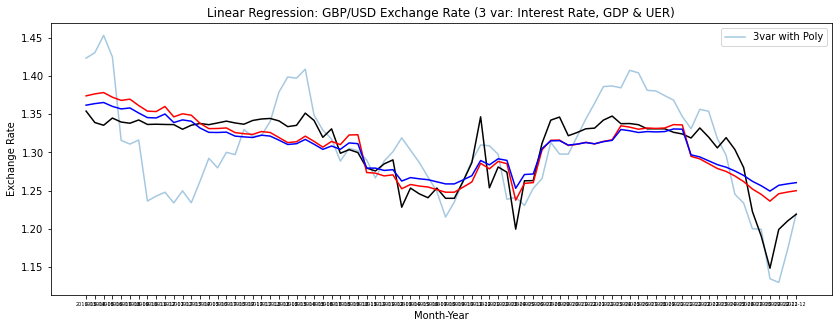

In [32]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.005)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print(ridge.score(x_ir_gdp_uer, y_fx))

lasso = Lasso(alpha=0.005)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print(lasso.score(x_ir_gdp_uer, y_fx))
 
plt.figure(figsize=(14,5))
plt.plot(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['3var with Poly'])
plt.title("Linear Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(y_pred)
print('stat=%.3f, p=%.3f' % adf_test[0:2])
if adf_test[1] > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-1.359, p=0.602
Probably not Stationary


In [34]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(y_pred, nlags='auto')

print('stat=%.3f, p=%.3f' % kpss_test[0:2])
if kpss_test[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably Not Stationary')

stat=0.418, p=0.069
Probably Stationary


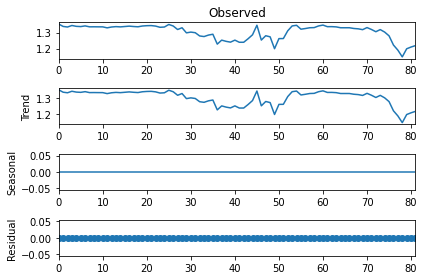

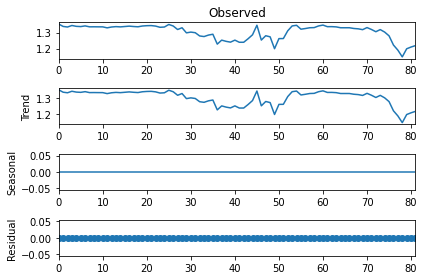

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
y_pred_list = y_pred.tolist()
result = seasonal_decompose(y_pred_list, model='additive', period=1)

result.plot()

In [36]:
date = list(range(1,83))
date_fx = pd.DataFrame(zip(date, y_pred_list), columns=['Date', 'FX'])

print(date_fx)

#Transformation: To stabilize the non-constant variance, use power transform, square root or log transform
date_fx_log = np.log(date_fx)

    Date        FX
0      1  1.353949
1      2  1.338959
2      3  1.335409
3      4  1.344828
4      5  1.339597
..   ...       ...
77    78  1.190569
78    79  1.148466
79    80  1.199108
80    81  1.210094
81    82  1.219027

[82 rows x 2 columns]


In [37]:
date_fx_log_diff = date_fx_log - date_fx_log.shift(1)
date_fx_log_diff.dropna(inplace=True)

y_stationary = date_fx_log_diff.iloc[:,1]

In [38]:
adf_test_2 = adfuller(y_stationary)
print('stat=%.3f, p=%.3f' % adf_test_2[0:2])
if adf_test_2[1] > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

#b. KPSS Test
kpss_test_2 = kpss(y_stationary, nlags='auto')

print('stat=%.3f, p=%.3f' % kpss_test_2[0:2])
if kpss_test_2[1] > 0.05:
    print('Probably Stationary')
else:
    print('Probably Not Stationary')

stat=-5.486, p=0.000
Probably Stationary
stat=0.063, p=0.100
Probably Stationary


C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


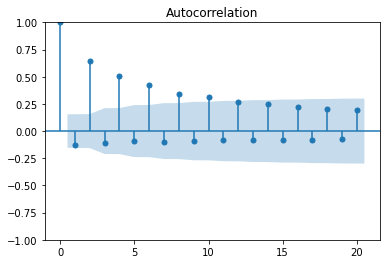

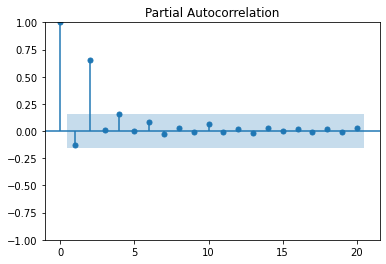

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

date_fx_log_diff = date_fx_log_diff.values.reshape(-1)

plot_acf(date_fx_log_diff, lags=20)
plot_pacf(date_fx_log_diff, lags=20)

plt.show()

In [40]:
from statsmodels.tsa.arima.model import ARIMA

y = date_fx_log.iloc[:, 1]


print(date_fx_log.shape)

#(p, d, q) = (3, 1, 2)
model_arima = ARIMA(y, order=(3,1,5))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

(82, 2)
                               SARIMAX Results                                
Dep. Variable:                     FX   No. Observations:                   82
Model:                 ARIMA(3, 1, 5)   Log Likelihood                 215.354
Date:                Sat, 10 Dec 2022   AIC                           -412.707
Time:                        11:50:14   BIC                           -391.157
Sample:                             0   HQIC                          -404.061
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1785      1.096      0.163      0.871      -1.969       2.326
ar.L2         -0.0401      0.440     -0.091      0.927      -0.902       0.822
ar.L3         -0.0803      0.223     -0.359 

C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [41]:
model_arima = ARIMA(y, order=(2,1,5))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     FX   No. Observations:                   82
Model:                 ARIMA(2, 1, 5)   Log Likelihood                 215.344
Date:                Sat, 10 Dec 2022   AIC                           -414.688
Time:                        11:50:14   BIC                           -395.532
Sample:                             0   HQIC                          -407.002
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3829      0.610      0.628      0.530      -0.812       1.578
ar.L2         -0.0997      0.292     -0.342      0.733      -0.672       0.472
ma.L1         -0.5305      0.627     -0.846      0.3

C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [42]:
model_arima = ARIMA(y, order=(1,1,5))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     FX   No. Observations:                   82
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 215.237
Date:                Sat, 10 Dec 2022   AIC                           -416.474
Time:                        11:50:15   BIC                           -399.713
Sample:                             0   HQIC                          -409.749
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1780      0.555      0.321      0.749      -0.910       1.266
ma.L1         -0.3268      0.536     -0.610      0.542      -1.378       0.724
ma.L2          0.1663      0.086      1.925      0.0

In [43]:
import itertools

p = range(0, 6)
d = range(0, 2)
q = range(0, 6)

pdq = list(itertools.product(p, d, q))

aics = []
params = []

for param in pdq:
    model = ARIMA(y, order=param)
    model_fit = model.fit()
    aic = model_fit.aic
    aics.append(aic)
    params.append(param)

combo = list(zip(aics, params))
combo.sort()

combo_array = np.array(combo)
print(combo_array)

C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

[[-420.01721468926326 (3, 0, 2)]
 [-419.70920595373497 (1, 0, 5)]
 [-419.6164442761459 (5, 0, 3)]
 [-419.4227556837959 (2, 0, 5)]
 [-418.80516105693664 (2, 0, 3)]
 [-418.2949550916764 (0, 1, 5)]
 [-418.2127558876424 (4, 0, 4)]
 [-417.2486572320005 (1, 1, 4)]
 [-417.2477989461881 (1, 0, 4)]
 [-417.11877833038335 (3, 0, 3)]
 [-416.7055928625962 (0, 1, 4)]
 [-416.57338575522954 (3, 0, 4)]
 [-416.5629964850656 (2, 0, 4)]
 [-416.533540708326 (5, 0, 0)]
 [-416.47372986067523 (1, 1, 5)]
 [-416.00928978031635 (2, 1, 2)]
 [-415.6834573286199 (2, 1, 4)]
 [-415.4752845280226 (0, 0, 3)]
 [-415.41628447958993 (1, 0, 3)]
 [-415.3226910838998 (1, 0, 2)]
 [-415.28536386037064 (1, 0, 0)]
 [-414.74779510364 (4, 0, 1)]
 [-414.68755579508485 (2, 1, 5)]
 [-414.6329105252189 (3, 0, 5)]
 [-414.6011687995543 (2, 0, 0)]
 [-414.5604208940216 (4, 0, 0)]
 [-414.52556500763734 (4, 1, 4)]
 [-414.4241553675651 (5, 0, 4)]
 [-414.3796001068979 (4, 0, 5)]
 [-414.32419715194845 (1, 0, 1)]
 [-414.2882643830852 (4, 0, 3)]

C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_9188\224086036.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  combo_array = np.array(combo)


In [44]:
model_arima = ARIMA(y, order=(3,0,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     FX   No. Observations:                   82
Model:                 ARIMA(3, 0, 2)   Log Likelihood                 217.009
Date:                Sat, 10 Dec 2022   AIC                           -420.017
Time:                        11:50:29   BIC                           -403.170
Sample:                             0   HQIC                          -413.253
                                 - 82                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2634      0.020     13.279      0.000       0.225       0.302
ar.L1          0.7306      0.128      5.691      0.000       0.479       0.982
ar.L2         -0.4469      0.175     -2.556      0.0

C:\Users\Toby\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

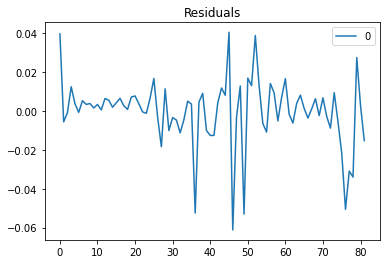

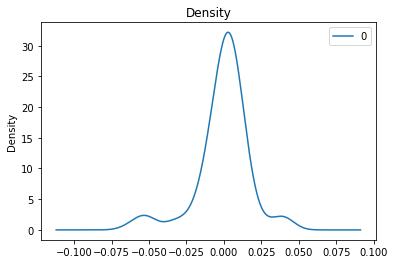

In [45]:
residuals = pd.DataFrame(model_arima_fit.resid)

residuals.plot(title='Residuals')
residuals.plot(kind='kde', title='Density')

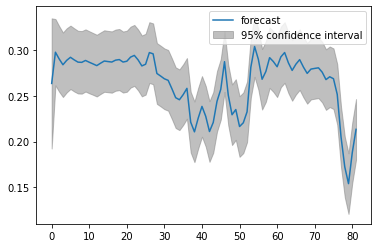

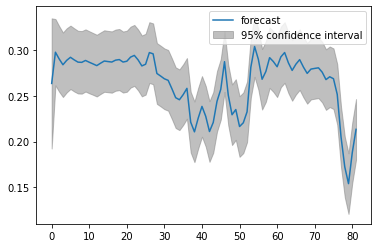

In [46]:
from statsmodels.graphics.tsaplots import plot_predict

pred = model_arima_fit.forecast(12,alpha=0.05)
plot_predict(model_arima_fit)

#plot_predict(model_arima_fit, dymanic=False)
#plt.show()

#fig, ax = plt.subplots(figsize=(10,8))
#fig = plot_predict(pred, start="2018-1-1", end="2023-2-1", ax=ax)
#legend = ax.legend(loc="upper left")

In [47]:
pred_month = np.array(list(zip(month_year_future, pred)))
print(pred_month)

[['2023-01' '0.21215683921539757']
 ['2023-02' '0.20748535287583744']
 ['2023-03' '0.21497636141322402']
 ['2023-04' '0.2291158004596584']
 ['2023-05' '0.23391893753108692']
 ['2023-06' '0.23460389792880665']
 ['2023-07' '0.23955379185223463']
 ['2023-08' '0.24510455236960688']
 ['2023-09' '0.2472673260867309']
 ['2023-010' '0.24867596449737073']
 ['2023-011' '0.25132795048391565']
 ['2023-012' '0.25364483810437954']]


In [48]:
pred = pred.astype(float)

pred = np.exp(pred)
forecast = pred.tolist()

gbp_2023 = np.array(list(zip(month_year_future, forecast)))
print(gbp_2023)

[['2023-01' '1.2363417767474258']
 ['2023-02' '1.2305796922545442']
 ['2023-03' '1.2398325887294241']
 ['2023-04' '1.2574876482265487']
 ['2023-05' '1.263542062217081']
 ['2023-06' '1.2644078349667267']
 ['2023-07' '1.270682035127811']
 ['2023-08' '1.2777548985238516']
 ['2023-09' '1.2805213837977514']
 ['2023-010' '1.2823264464464283']
 ['2023-011' '1.2857316715214164']
 ['2023-012' '1.2887140208644428']]


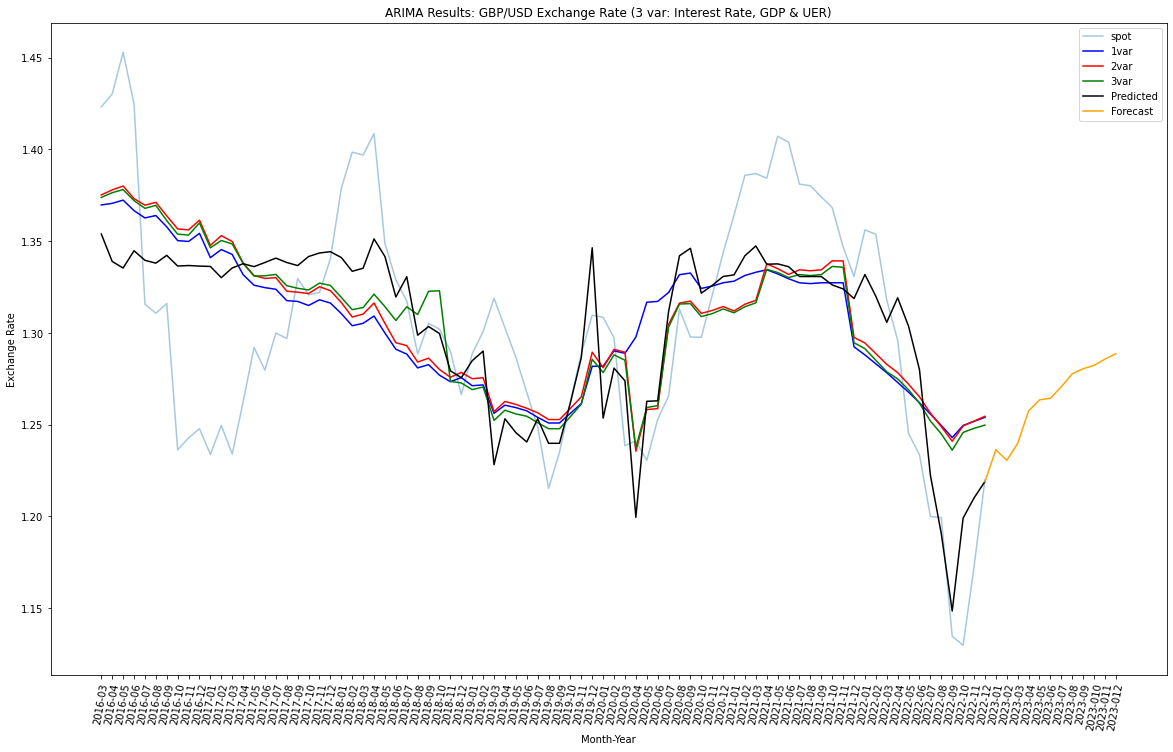

In [53]:
x_merge = ['2022-12', '2023-01']
y_merge = [y_pred[-1], forecast[0]]

plt.figure(figsize=(20,12))
plt.plot(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.plot(x_merge, y_merge, color='orange')
plt.plot(month_year_future, forecast, color='orange')
plt.legend(['spot', '1var', '2var', '3var', 'Predicted', 'Forecast'])
plt.title("ARIMA Results: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=10, rotation=80)
plt.show()